**Steps:** Data(feed)--Model(--Objective Function(Compare)--Optimization Algorithm(vary).
Note that this steps are iterative.

**Supervised Lrarning** Can be divided into classification and regression.
Classsification provides outputs which are categories such as cats or dogs. While Regressionproduces numeric outputs such as 0s, 1s monetary values etc

**Unsupervised Learing** Is useful wehn our goal is to split a dataset into a certain number of categories which we do not know prior to implementation(Clustering)

**Reinforcememnt Lrarning** We train a model to aact in an enviroment based on the rewards recieved.

**Objective function** It is the measure used to evaluate how well the model's output match the desired correct values. Obkective functions are generally split into two: Loss and Reward Functions.

**Loss Functions:** The lower the loss function, the higher the level of accuracy of the model.Helps to minimize the error of prediction. Typicallyused in supervised learning

**Reward Function:** The higher the reward function, the higher the level of accuracy of the model. They are usually used in reinenforncement learning the goal is to maximise specific results. 

**Types of Loss Functions**
**L2-norm loss(Regression):** The method of calculation is same as that used in ordinary Least Square in stats. "Norm" comes from teh fact it is the vector norm, or euclidean distance of the outputs and the targets. The lower the error, the lower the loss.

**Cross Entropy(Classification):** 

The lower the loss, the more accurate the model.

Any function that holdds the basic property; Higher for worse results, lower for better results can be a loss function.



## Simple Linear Regression

In [0]:
#Import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
# Generate random input data to train on
observations = 1000
x = np.random.uniform(low=-10, size=(observations, 1))
z = np.random.uniform(-10, 10,(observations, 1))

# np.stack takes a sequence of 1D arrays and stacks them into a single 2D array
inputs = np.column_stack((x,z))

inputs.shape

(1000, 2)

In [0]:
# Create the target
# noise hleps randomize our data a bit. real data always contains noise, it's never perfect
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*x - 3*z + noise

In [0]:
# Initialize teh variables
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, size=(2,1))

biases = np.random.uniform(-init_range, init_range, size=1)

print(weights)

print(biases)

[[0.02661617]
 [0.04964167]]
[0.04240466]


In [0]:
# Set a learning rate

learning_rate  = 0.02

## Train the Model

In [0]:
for i in range(100):
  #calcuates outputs for given weights and biases
  outputs = np.dot(inputs, weights) + biases
  #deltas record the differece between outputs and targets
  deltas = outputs - targets
  # print the loss for later analysis
  loss = np.sum(deltas **2) /2 / observations

  print(loss)
  
  #update the weights and biases folowing the gradient decent methodology
  deltas_scale = deltas / observations

  weights = weights - learning_rate * np.dot(inputs.T, deltas_scale)

  biases = biases - learning_rate * np.sum(deltas_scale)

212.92084897633117
26.660348508738178
3.565955306797402
0.617957045146077
0.23159448492990553
0.17973527954030885
0.1725688511293635
0.17148823332608912
0.1712497630657539
0.17113016508092022
0.17102847055730758
0.17093044471143215
0.17083405452836625
0.1707389955841188
0.1706452097438583
0.17055267425834433
0.17046137163967348
0.17037128534454227
0.1702823991523025
0.17019469707310442
0.17010816333222703
0.17002278236539997
0.16993853881573912
0.169855417530946
0.169773403560577
0.1696924821533529
0.1696126387545075
0.16953385900316714
0.16945612872976948
0.16937943395351476
0.1693037608798504
0.16922909589799054
0.16915542557846736
0.16908273667071655
0.16901101610069313
0.16894025096852025
0.16887042854616913
0.16880153627516944
0.16873356176435067
0.16866649278761353
0.1686003172817307
0.16853502334417744
0.1684705992309902
0.16840703335465457
0.16834431428202182
0.16828243073225121
0.1682213715747821
0.1681611258273312
0.16810168265391764
0.16804303136291407
0.16798516140512354
0.

Our output above is a list of numbers that appear in descending order. These are the values of our averaged loss function.

In [0]:
print(weights, biases)

[[ 1.98008304]
 [-3.00364718]] [-0.11703092]


Plot last output vs target

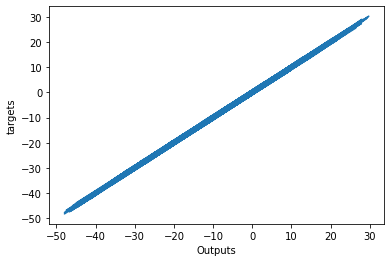

In [0]:
plt.plot(outputs, targets)
plt.xlabel('Outputs')
plt.ylabel('targets')
plt.show()

From above, the closer the price is to a 45 degree line, the closer target and output values are

## TensorFlow Deep Dive

One of the major advantages of TF is that it uses both CPU and GPU, TPU which helps speeds up the algorithm.
Tensorflow does'nt work well with .csv or xlxs files. it is tensor based, therefoer, works better with tensors. 
.npz files(numpy file type) which allows u store nd arrays.
Tensors can be represented as n-dimensional arrays



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Integration

In [0]:
observations = 1000
xs = np.random.uniform(low = -10, high=10, size=(observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

In [0]:
generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*zs - 3*zs + 5 + noise

In [0]:
np.savez('TF_intro', inputs =generated_inputs, targets=generated_targets)

## Solving with TF

In [0]:
training_data = np.load('TF_intro.npz')

In [0]:
input_size = 2
output_size =1

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
])

In [0]:
model.compile(optimizer='sgd', loss ='mean_squared_error')

In [0]:
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=0)

## Extract the weights and bias

In [0]:
model.layers[0].get_weights()

[array([[-0.01847873],
        [-0.97272956]], dtype=float32), array([4.985204], dtype=float32)]

In [0]:
bias = model.layers[0].get_weights()[1]
bias

array([4.985204], dtype=float32)

## Extract the outputs (Make predictions

In [0]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-1.1],
       [ 3.8],
       [ 4.2],
       [11.8],
       [-4.4],
       [12. ],
       [12.5],
       [ 7.1],
       [-1.1],
       [-1.9],
       [-4.5],
       [10. ],
       [-4. ],
       [10.6],
       [ 8.9],
       [ 6.2],
       [ 4. ],
       [ 0.2],
       [ 5.5],
       [ 2.1],
       [13.8],
       [10.4],
       [ 9.4],
       [ 7.2],
       [ 1. ],
       [-4.6],
       [ 8.8],
       [ 5.2],
       [13.2],
       [ 4. ],
       [-1.6],
       [ 9.5],
       [ 1.4],
       [12.2],
       [14.1],
       [-1.2],
       [ 5.5],
       [13.6],
       [ 2.7],
       [ 0.4],
       [ 7.1],
       [ 6.8],
       [-0.5],
       [12.4],
       [ 2.5],
       [-3.1],
       [13.4],
       [11.2],
       [ 9.6],
       [ 0.6],
       [13.7],
       [ 2.1],
       [13.6],
       [ 0.5],
       [-2.2],
       [-4.3],
       [ 6.6],
       [-2.4],
       [-2. ],
       [ 0.2],
       [-3.2],
       [ 2.1],
       [ 6. ],
       [13.7],
       [ 9.6],
       [ 6.8],
       [-2

## Plotting the output

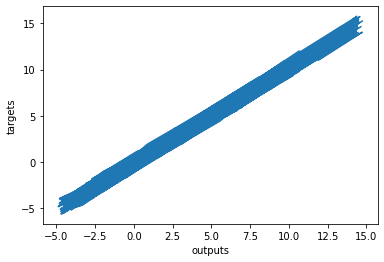

In [0]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

## Layers

Layers are the building block of Neural Nets

## Non-Linearities
In order to have deep nets and find complex relationships through arbitrary functions, we need non-linearities.

In ML non-linearities are also called activation functions.

Activation functions transform inputs into outputs of a different kind.

The four most use activation functions are:
* Sigmoid (Logistic Function)
* TanH (hyperbolic tangent
* Relu (rectified linear unit)
* softmax

## SoftMax
The softmax transformation transforms a bunch of arbitrary large or small numbers into a valid probability distribution.

A key aspect of the softmax transformation is that the valeus it outputs are in the range from 0 to 1. Their sum is exactly 1.


## Backpropagation
Consist of a single step; aligning the weights given the errors obtained.


## Forwardpropagation
Is the process of pushing inputs through the net. At the end of each epoch, the obtained outputs are compared to the targets to from the erros.

The accuracy gotten by forward propagtting the dataset is the accuracy we expect the model to have if we deploy it in real life.

## OverFitting
Ways to deal with overfitting
* Split the data into Test, Validation and Trainng Sets

* **Early Stoping:** stop when updates becoe too small

* **Use The N-Fold Cross-Validation:** where the dataset is too small

* **Validation Set Strategy:** Stop when the validation loss starts incresing ro teh training loss becomes very small

## Intialization
It is the process in which we set the initail values of weights.

**Types of Simple Initializations**

1. Xavier's Initialization(Uniform and Normal): The main idea is that, the method is not so imoortant, the number of inputs and outputs is.

* **Uniform Xavier Initialization:** draws each weight, w from a random uniform distribution.

* **Normal Xavier Initialization:**


## Optimizaton

**Gradient Descent** A single gradient descen tis slow but willl eventually reach the minimum

**SGD (Stochastic gradient descent:** Weights are updated many times inside a single epoch

**Batching:** The process of splitting the dataset in n batches (mini-batches). Weights are updated after every batch instead epoch as in the case of SGD. It is more faster than the SGD.

## Learning Rate Scheldules

**Hyperparameters:** preset by the data scientist. comprises of width, depth and the learning rate, batch size, momentum coefficient, decay coefficient.

**Parameters:** Found by optimizing. Comprises of weights and biases.

For a proper learning rate:
1. We start from a high initial learning rate
2. At some point, we lower the rate to avoid oscillation
3. Around the end, we pick a very small rate to get a precise answer.

Exponential Scheldule: Still simple, but much better as it smoothly decays the learning rate.

**Adaptive Learning Scheldules(AdaGrad-Adaptive gradient algorithm):** It dynamically varies the learning rate at each update and for each weight individually.
Adagrad is smart, it's based on the training itself, adaption is per weight.

**RMSprop (Root Mean Square propagation):** Similar to AdaGrad
It adapts upwards and downwards since it;s not monotomous.

**Aaptive Momemnt Estimation(ADAM):** It is the best learning method. plus, it is a new mehtod.

## Preprocessing

Any manipulaton applied to the dataset beofre running it throught the model.

**Motivation for Preprocessing DAta**
* Compatibility: make data format suitable for libraries. e.g convert csv to .npz fiels for tensorflow librabry.
*Orders of Magnitude:
*Generalization: train models to be resused on new use cases.

**Categorical Data**
We encode categorical data in two ways:
* One hot encoding: involes creating new columns for all categories. It is best when dealing with few categories.

* Binary encoding: implies transforming the categories in to binaries. Even though binary encoding is helpul, its a bit promblematic. best when dealing with many categories.